<a href="https://colab.research.google.com/github/andressriosg/Topicos-en-Estadistica/blob/main/clasetopicosregresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # Descargamos todos los paquetes y librerías que vamos a utilizar
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving natalidad.csv to natalidad.csv


In [6]:
import io
tabla = pd.read_csv(io.BytesIO(uploaded['natalidad.csv']), sep = ";", index_col=0, encoding='latin-1')
tabla.head(4)

<ipython-input-6-58c33c1c86bc>:2: DtypeWarning: Columns (4,14,22,28) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(io.BytesIO(uploaded['natalidad.csv']), sep = ";", index_col=0, encoding='latin-1')


,areanac,cod_insp,sit_parto,otro_sit,nom_inst,cod_inst,sexo,peso_nac,talla_nac,fecha_nac,...,n_emb,seg_social,idclasadmi,nomclasad,codclasad,edad_padre,niv_edup,ultcurpad,barrio_res,comuna_res
id,,,,,,,,,,,,,,,,,,,,,
1,1,NaN,1,NaN,PROMOTORA MEDICA LAS AMERICAS S.A,5.001021e+10,2,1070,38,23/04/2012,...,4,1,1.0,COOMEVA E.P.S. S.A.,EPS016,42,4,11,El RincÃ³n,16 Belen
2,1,NaN,1,NaN,CLINICA DEL PRADO S.A.,5.001046e+10,2,2900,47,30/05/2012,...,1,1,1.0,SALUD TOTAL S.A. ENTIDAD PROMOTORA DE SALUD,EPS002,25,99,9,Versalles N.2,03 Manrique
3,1,NaN,1,NaN,CLINICA UNIVERSITARIA BOLIVARIANA,5.001034e+10,2,2510,48,04/06/2012,...,2,5,NaN,NaN,NaN,34,8,3,Santa MÃ³nica,12 La America
4,1,NaN,1,NaN,UNIDAD HOSPITALARIA DE MANRRIQUE HERMENEGILDO ...,5.001022e+10,1,3400,50,25/09/2012,...,1,5,NaN,NaN,NaN,24,99,9,Enciso,08 Villa Hermosa


In [12]:
tabla.columns

Index(['areanac', 'cod_insp', 'sit_parto', 'otro_sit', 'nom_inst', 'cod_inst',
       'sexo', 'peso_nac', 'talla_nac', 'fecha_nac', 'ano', 'mes', 'aten_par',
       'otrparatx', 't_ges', 'numconsul', 'tipo_parto', 'mul_parto',
       'idhemoclas', 'idfactorrh', 'idpertet', 'nom_pueb', 'edad_madre',
       'est_civm', 'niv_edum', 'codptore', 'codmunre', 'cod_barrires',
       'n_hijosv', 'fecha_nacm', 'n_emb', 'seg_social', 'idclasadmi',
       'nomclasad', 'codclasad', 'edad_padre', 'niv_edup', 'ultcurpad',
       'barrio_res', 'comuna_res'],
      dtype='object')

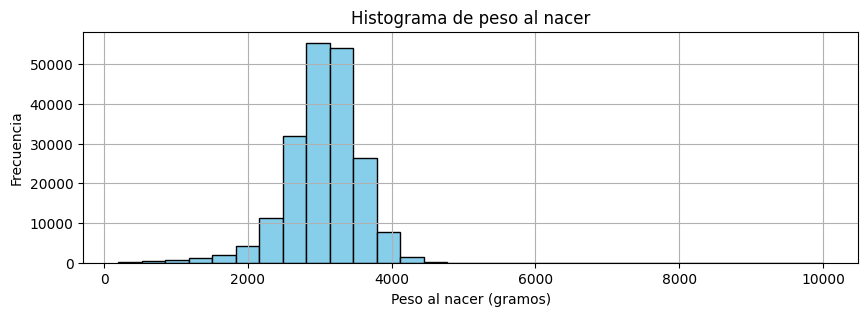

In [9]:
plt.figure(figsize=(10, 3))
plt.hist(tabla['peso_nac'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de peso al nacer')
plt.xlabel('Peso al nacer (gramos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

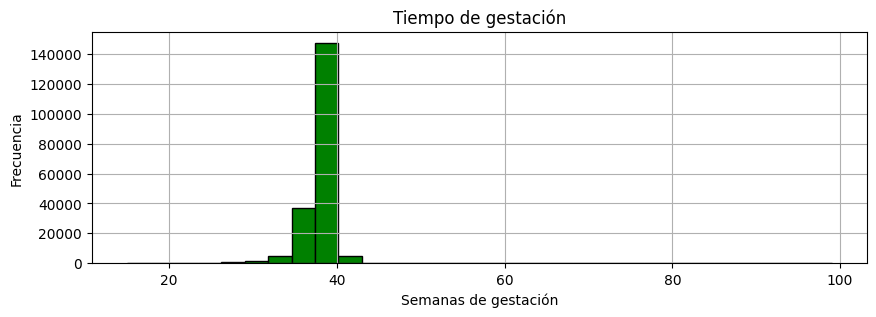

In [13]:
plt.figure(figsize=(10, 3))
plt.hist(tabla['t_ges'].dropna(), bins=30, color='green', edgecolor='black')
plt.title('Tiempo de gestación')
plt.xlabel('Semanas de gestación')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

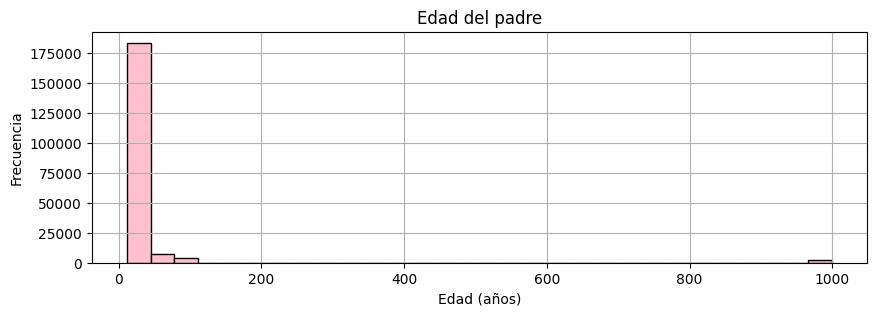

In [15]:
plt.figure(figsize=(10, 3))
plt.hist(tabla['edad_padre'].dropna(), bins=30, color='pink', edgecolor='black')
plt.title('Edad del padre')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

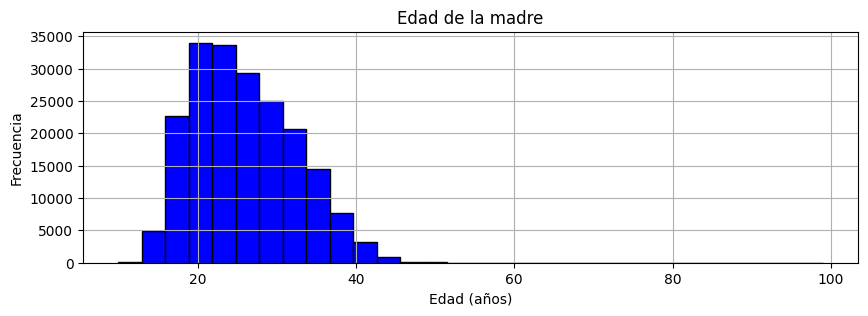

In [16]:
plt.figure(figsize=(10, 3))
plt.hist(tabla['edad_madre'].dropna(), bins=30, color='blue', edgecolor='black')
plt.title('Edad de la madre')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [17]:
sin_atipicos = tabla[(tabla["peso_nac"] < 6000) & (tabla["t_ges"] < 60) & (tabla["edad_padre"] < 100) & (tabla["edad_madre"] < 60)]
sin_atipicos.head(3)

,areanac,cod_insp,sit_parto,otro_sit,nom_inst,cod_inst,sexo,peso_nac,talla_nac,fecha_nac,...,n_emb,seg_social,idclasadmi,nomclasad,codclasad,edad_padre,niv_edup,ultcurpad,barrio_res,comuna_res
id,,,,,,,,,,,,,,,,,,,,,
1,1,NaN,1,NaN,PROMOTORA MEDICA LAS AMERICAS S.A,5.001021e+10,2,1070,38,23/04/2012,...,4,1,1.0,COOMEVA E.P.S. S.A.,EPS016,42,4,11,El RincÃ³n,16 Belen
2,1,NaN,1,NaN,CLINICA DEL PRADO S.A.,5.001046e+10,2,2900,47,30/05/2012,...,1,1,1.0,SALUD TOTAL S.A. ENTIDAD PROMOTORA DE SALUD,EPS002,25,99,9,Versalles N.2,03 Manrique
3,1,NaN,1,NaN,CLINICA UNIVERSITARIA BOLIVARIANA,5.001034e+10,2,2510,48,04/06/2012,...,2,5,NaN,NaN,NaN,34,8,3,Santa MÃ³nica,12 La America


In [18]:
df = sin_atipicos[["peso_nac", "t_ges", "edad_madre", "edad_padre"]]
df.head(5)

,peso_nac,t_ges,edad_madre,edad_padre
id,,,,
1,1070,30,39,42
2,2900,40,21,25
3,2510,36,37,34
4,3400,41,22,24
5,3760,39,40,41


In [19]:
x = df[["t_ges", "edad_madre", "edad_padre"]] # Variables explicativas
y = df["peso_nac"] # Variable respuesta
x.head(2)

,t_ges,edad_madre,edad_padre
id,,,
1,30,39,42
2,40,21,25


In [20]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2, random_state=0)

In [28]:
sc=StandardScaler()
scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)
testX_scaled
testX_scaled = np.array(testX_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(15,10,50,35),
                       max_iter = 300, activation = 'relu',
                       solver = 'adam') # Red neuronal percentrón multicapa para algoritmos de regresión
mlp_reg.fit(trainX_scaled, trainY) # Entrenamiento de la red con datos de entrenamiento los datos estandarizados de las variables explicativas

MLPRegressor(hidden_layer_sizes=(15, 10, 50, 35), max_iter=300)

In [32]:
import numpy as np
from sklearn.linear_model import LinearRegression
modelo = LinearRegression() # Implementamos la regresión lineal múltiple
modelo.fit(trainX_scaled, trainY) # Entrenamiento del modelo de regresión lineal múltiple con datos de entrenamiento los datos estandarizados
# de las variables explicativas

LinearRegression()

In [33]:
y_predred = mlp_reg.predict(testX_scaled) # Predicción de la red neuronal para los datos de validación
y_predrlm = modelo.predict(testX_scaled) # Predicción de la regresión lineal múltiple para los datos de validación

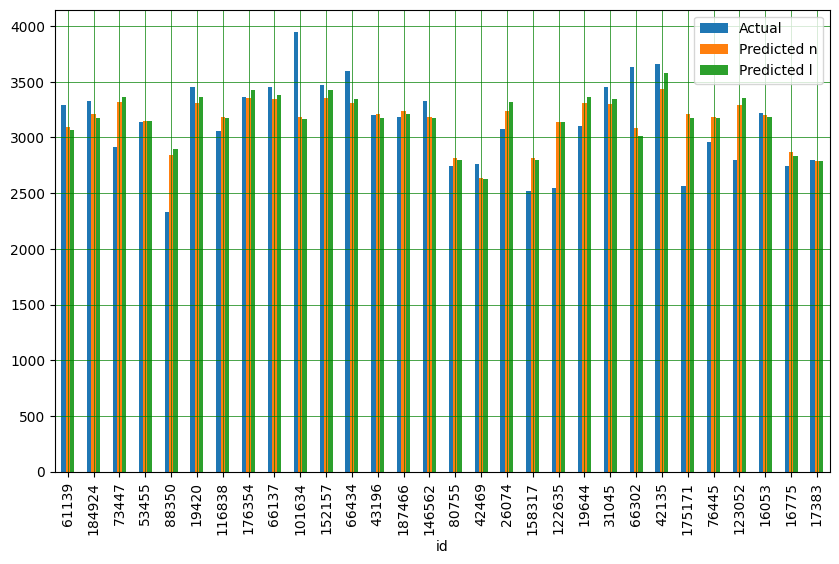

In [34]:
df_temp = pd.DataFrame({'Actual': testY, 'Predicted n': y_predred, 'Predicted l': y_predrlm})
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [36]:
print('Mean Absolute Error n:', metrics.mean_absolute_error(testY, y_predred),
      'Mean Absolute Error l:', metrics.mean_absolute_error(testY, y_predrlm))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_predred),
      'Mean Squared Error l:', metrics.mean_squared_error(testY, y_predrlm))

Mean Absolute Error n: 282.21641044592695 Mean Absolute Error l: 286.55779292472226
Mean Squared Error: 129337.1482209937 Mean Squared Error l: 133136.7663863759


La red neuronal percetrón multicapa presenta mejor ajuste, tanto para el error medio absoluto como para el cuadrado medio del error, con respecto a la regresión lineal múltiple

In [37]:
from sklearn.metrics import r2_score
print(r2_score(testY, y_predred))
print(r2_score(testY, y_predrlm))

0.47335288880721815
0.4578812477670505


La red neuronal percetrón multicapa presenta mejor ajuste, para el coeficiente de determinación, con respecto a la regresión lineal múltiple. Se observa de los coeficientes de determinación que ambos modelos presentan underfitting (bajo ajuste)

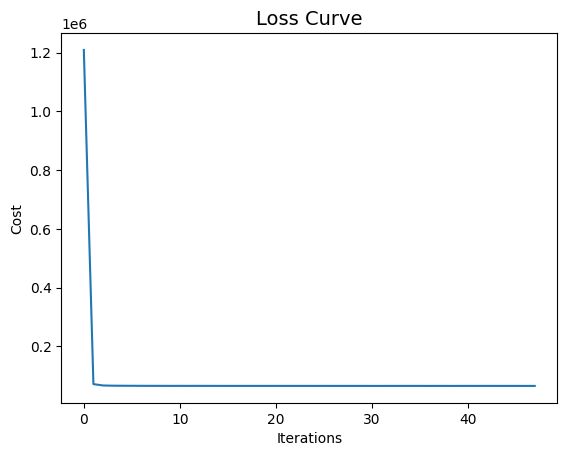

In [38]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()